Your goal in this task is to implement aLogistic Regression Classifier.


In [1]:
%pylab inline
import math
import numpy as np
import scipy.stats
from collections import defaultdict  # default dictionary 

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Cutomize the Matplotlib for beautiful plots...
#comment it if it does not work for you.
import dmStyle
dmStyle.customize_mpl()


Setting custom matplotlib visual style


In [3]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..

###Logistic Regression
Given a set of $m$ $d$-dimensional labelled training examples $X$ and their labels $Y $($Y \in \{0, +1\})$.
Your goal in this assignment is to implement Logistic Regression classifier. Recall that a Logistic Regression uses the hypothesis $\begin{equation} h_\theta(x) = \frac{1}{1+\exp(-x^T\theta)}. \end{equation}$ . 

In Logistic Regression we try to optimize (minimize) following cost function (without regularization) to find the optimal (a separator that separates maximially both the classes) separating decision boundary (plane or hyperplane):


$$J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\lbrack-y^{(i)}log(h_\theta(x^{(i)})) - (1-y^{(i)})log(1-h_\theta(x^{(i)}))\rbrack$$

The gradient of this cost functions is a vector of the same length as $\theta$ where the $j^{th}$ element (for $j = 0,1,...,k$) is defined as follows:

$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}\left(h_\theta(x^{(i)})-y^{(i)}\right)x_j^{(i)}$$

Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_\theta(x)$


We will be adding an extra column to our X input matrix for the offset, then we can write our hypothesis in the form of matrix-vector product. I.e. earlier we were writing our hypothesis as: $h_\theta(x^i)=\theta_0+ x^i *\theta_1$, [*Remember the notation we are using, superscript is being used to represent the example, and subscript is being used for representing the feature, so $x^i_j$ means j-th feature of i-th example in our set*]

Since we can write this expression in the form of dot product, i.e.  $h_\theta(x^i)=x^{(i)T}\theta$

So to simplify the calculations we will append an extra 1 at the start of each example to perform these computations using matrix-vector product.
 




In [4]:
def GradientDescent(X,Y,cost_function,derivative_cost_function,maxiter, alpha, plotcf=True):
    
    eps=0.00001
    #print X.shape
    nexamples=float(X.shape[0])
    thetas=rand(X.shape[1],1)
    

    converged = False
    numiter =0
    CF = cost_function(X,Y,thetas)
    while not converged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        grad =derivative_cost_function(X,Y,thetas)

        for k in range(len(thetas)):
            thetas[k]=thetas[k] - alpha * grad[k]

        # mean squared error
        e = cost_function(X,Y,thetas) 
        
        if abs(CF-e) <= eps:
            print 'Converged, iterations: ', numiter, '!!!'
            converged = True
        
        CF = e   # update error 
        numiter += 1  # update iter
    
        if numiter == maxiter:
            print 'Max interactions exceeded!'
            converged = True
    print 'Value of Cost Function (obtained in {} iterations) at Minimum Points {}, is {}'.format(numiter,thetas,CF)
    return thetas

In [112]:

class LogisticRegression:
    def __init__(self, scalefeatures=False):        
        self.theta=[] # learned set of parameters
        self.scalefeatures=scalefeatures
 
    
    
    def hypothesis(self, X,theta):
   
        h=1/(1+np.exp(-np.dot(X.T,theta)))
        return h
    def cost_function(self, X,Y, theta):

    
        m=X.shape[0]
        cost =  (1.0/m) * sum([((-Y[i]*(np.log(self.hypothesis(X[i,:],theta))))-((1-Y[i])*(np.log(1-self.hypothesis(X[i,:],theta))))) for i in range(m)])
        return cost    

    def derivative_cost_function(self,X,Y,theta):
  
        nexamples=float(X.shape[0])
        m=X.shape[0]
        partialDerivatives=[]
        for j in range(len(theta)):
            derivative=(1.0/m) * sum([(self.hypothesis(X[i,:],theta)-Y[i])*X[i][j] for i in range(m)])
            partialDerivatives.append(derivative)
        return np.asarray(partialDerivatives)
    
    def train(self, X, Y):

        
        nexamples,nfeatures=X.shape
        ## now go and train a model for each class...
        if self.scalefeatures:
            X=self.scale_features(X)
        maxiter=20000
        alpha=0.01
        self.theta=GradientDescent(X,Y,self.cost_function,self.derivative_cost_function,maxiter,alpha,True)
        
        
        
    
    def predict(self, X):

        num_test = X.shape[0]
        pclasses=[]
        h=[]
        for i in range(num_test):
            h.append(self.hypothesis(X[i,:],self.theta))
        for j in range(len(h)):
            if (h[j]>0.5):
                pclasses.append(1)
            else:
                pclasses.append(0)
        return pclasses
    
    
    def scale_features(self,X):

        self.xmin= np.min(X,axis=0)
        self.xmax= np.max(X,axis=0)

        return (X-self.xmin)/(self.xmax-self.xmin)


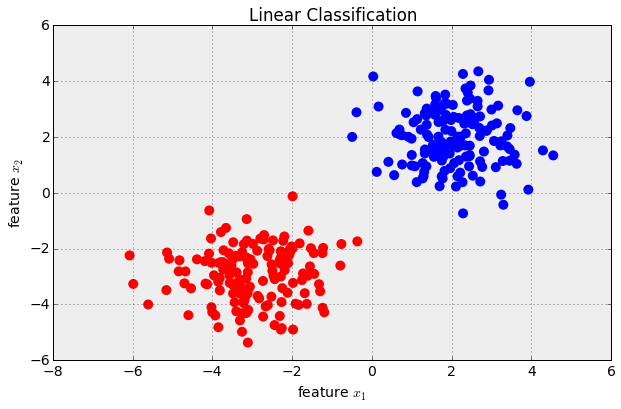

In [113]:
# Create some dummy data for testing

np.random.seed(seed=99)

# make some data up
mean1 = [-3,-3]
mean2 = [2,2]
cov = [[1.0,0.0],[0.0,1.0]] 

#create some points
nexamples=300
x1 = np.random.multivariate_normal(mean1,cov,nexamples/2)
x2 = np.random.multivariate_normal(mean2,cov,nexamples/2)

X=np.vstack((x1,x2))
Y=np.vstack((1*np.ones((nexamples/2,1)),np.zeros((nexamples/2,1))))

plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='b', s=100)



plt.title("Linear Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")

fig_ml_in_10 = plt.gcf()
plt.savefig('linear-class-svm.svg',format='svg')

In [114]:
print X.shape,Y.shape

(300L, 2L) (300L, 1L)


In [115]:
#Lets append a vector of dummy 1's at the start of X to simplify the calculations...
X=np.hstack((X,np.ones((X.shape[0],1))))

In [116]:
print X.shape,Y.shape

(300L, 3L) (300L, 1L)


In [117]:
#
def test_derivative(X,Y,cost_function,derivative_cost_function):

    thetas=np.random.rand(X.shape[1],1)
    ad=derivative_cost_function(X,Y,thetas)
    print ad
    eps=0.0001
    cd=[]

    for i in range(len(thetas)):
        ttpe=thetas.copy()
        ttpe[i]=ttpe[i]+eps # add an epsilon for the current theta
        ttme=thetas.copy()
        ttme[i]=ttme[i]-eps # add an epsilon for the current theta
        print 'diff in direction', ttpe-ttme    
        cd.append((cost_function(X,Y,ttpe)-cost_function(X,Y,ttme))/(2*eps))

    print 'Computational derivatvie =',cd
    print 'Analytical derivative =', ad.shape,ad.T
    print 'Their difference=',np.reshape(cd,ad.shape)-ad

In [118]:
#%pdb
lrclass=LogisticRegression()

In [119]:
test_derivative(X,Y,lrclass.cost_function,lrclass.derivative_cost_function)

[ 2.3953289   2.33456087  0.01718006]
diff in direction [[ 0.0002]
 [ 0.    ]
 [ 0.    ]]
diff in direction [[ 0.    ]
 [ 0.0002]
 [ 0.    ]]
diff in direction [[ 0.    ]
 [ 0.    ]
 [ 0.0002]]
Computational derivatvie = [2.3953289019118529, 2.334560864392099, 0.01718006474193956]
Analytical derivative = (3L,) [ 2.3953289   2.33456087  0.01718006]
Their difference= [ -1.21787647e-09  -1.13723164e-09   1.40783600e-11]


In [120]:
lrclass.train(X,Y) 

Converged, iterations:  1397 !!!
Value of Cost Function (obtained in 1398 iterations) at Minimum Points [[-1.15182997]
 [-1.14161323]
 [ 0.09836118]], is 0.0167810616632


[ 6.22002212] [-4.50332373]


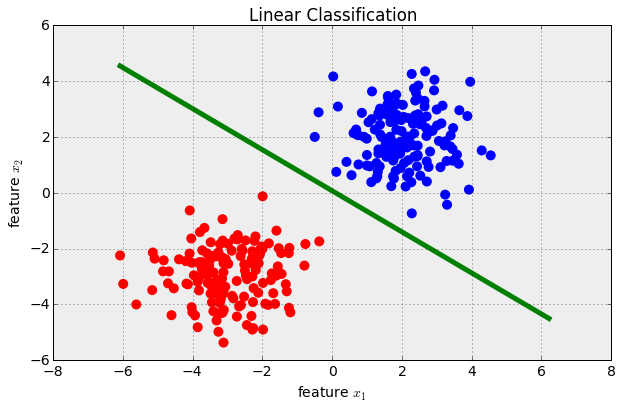

In [121]:
#Lets plot the decision boundary...
plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='b', s=100)

minx=min(X[:,0])
maxx=max(X[:,0])

y1=(-lrclass.theta[2]-lrclass.theta[0]*minx)/lrclass.theta[1]
y2=(-lrclass.theta[2]-lrclass.theta[0]*maxx)/lrclass.theta[1]
print y1, y2
plt.plot([minx,y1],[maxx,y2], c='g', linewidth=5.0)

plt.title("Linear Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")

fig_ml_in_10 = plt.gcf()
plt.savefig('linear-class-svm-class.svg',format='svg')

(10000L, 3L)
[1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,

(-5.3678375947281065, 4.3540144301612509)

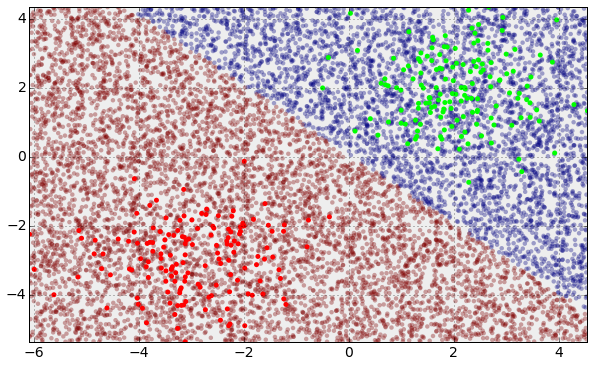

In [122]:
npts=10000
model=lrclass
ax=plt.gca()
x0spr = max(X[:,0])-min(X[:,0])
x1spr = max(X[:,1])-min(X[:,1])

tx=np.random.rand(npts,2)
tx[:,0] = tx[:,0]*x0spr + min(X[:,0])
tx[:,1] = tx[:,1]*x1spr + min(X[:,1])

tx=np.hstack((tx,np.ones((tx.shape[0],1))))

print tx.shape
cs= model.predict(tx)
print cs, np.unique(cs)
ax.scatter(tx[:,0],tx[:,1],c=cs, alpha=.35)

ax.hold(True)
ax.scatter(X[:,0],X[:,1],
             c=list(map(lambda x:'r' if x==1 else 'lime',Y)), 
             linewidth=0,s=25,alpha=1)
ax.set_xlim([min(X[:,0]), max(X[:,0])])
ax.set_ylim([min(X[:,1]), max(X[:,1])])